In [ ]:
import math as m
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

# Функция для выборок

ƒ = $a * x^3 + b ⭑ x^2 + c * x + d $

In [ ]:
a, b, c, d = [np.random.uniform(-3, 3) for _ in range(4)]
def poly(x):
    return a * x**3 + b * x**2 + c * x + d

$f = x * sin(2 * pi * x) $

In [ ]:
def f_sin(x):
    return x * torch.sin(2 * torch.pi * x)

Оборачиваем всё в dataset

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, min_x, max_x, formula, num_samples=1000, e_0 =0.01):
        self.min_x = min_x  #отрезок, в интервале которого мы будем генерировать наши значения
        self.max_x = max_x
        self.formula = formula
        self.num_samples = num_samples
        # генерируем значения от -1 до 1
        self.x = [torch.rand(1) * (self.max_x - self.min_x) + self.min_x for i in range (num_samples)]
        self.y = [self.formula(x_i) + np.random.normal(-e_0, e_0) for x_i in self.x]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

Определяем свой МСП

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, hidden_layers, num_neurons, activation_function):
        super(Net, self).__init__()

        self.layers = nn.ModuleList() # Создаем список слоев нейронной сети

        # Добавляем входной слой
        self.layers.append(nn. Linear(in_features=1, out_features=num_neurons))
        self.layers.append(activation_function())

        # Добавляем скрытые слои с функцией активации
        for _ in range(hidden_layers):
            self.layers.append(nn.Linear(in_features=num_neurons, out_features=num_neurons))
            self.layers.append(activation_function())

        # Добавляем выходной слой
        self.layers.append(nn.Linear(in_features=num_neurons, out_features=1))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
def fit(model, loss_function, optimizer, train_loader, test_loader, epochs, statistic=True):
    for epoch in range(epochs):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)


            loss = loss_function(output, target)
            loss.backward()
            optimizer.step()

        if (statistic and (((epoch+1) % 100 == 0) or epoch == 0)):
            with torch.no_grad():
                model.eval()
                test_loss = 0
                for data, target in test_loader:
                    output = model(data)
                    test_loss += loss_function(output, target).item()
                test_loss /= len(test_loader.dataset)
                acc = 100 - 100 * test_loss
                print(f"Epoch: {epoch+1} | Test loss: {test_loss:.4f} | Accuracy: {acc:.4f}")

## Входные параметры

In [ ]:
seed = 10;
torch.manual_seed(seed)
np.random.seed(seed)

# Для модели
num_hidden_layers = 2
num_perceptrons_in_layer = 512
activ_function = nn.Tanh
batch_size = 16
learning_rate = 0.001
epochs = 800

# Для dataset-a
min_x = -1
max_x = 1
formula = f_sin
num_train_data = 100
num_test_data = 50
e_train = 0.1
e_test = 0.1

# Настройка параметров модели
curr_model = Net(num_hidden_layers, num_perceptrons_in_layer, activ_function)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(curr_model.parameters(), lr=learning_rate)

## Результат обучения

In [ ]:
train_data = CustomDataset(min_x, max_x, formula, num_train_data, e_train)
test_data = CustomDataset(min_x, max_x, formula, num_test_data, e_test)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

fit(curr_model, loss_function, optimizer, train_loader, test_loader, epochs)

Epoch: 1 | Test loss: 0.0084 | Accuracy: 99.1588
Epoch: 100 | Test loss: 0.0075 | Accuracy: 99.2473
Epoch: 200 | Test loss: 0.0074 | Accuracy: 99.2602
Epoch: 300 | Test loss: 0.0072 | Accuracy: 99.2799
Epoch: 400 | Test loss: 0.0077 | Accuracy: 99.2285
Epoch: 500 | Test loss: 0.0088 | Accuracy: 99.1182
Epoch: 600 | Test loss: 0.0097 | Accuracy: 99.0319
Epoch: 700 | Test loss: 0.0094 | Accuracy: 99.0596
Epoch: 800 | Test loss: 0.0096 | Accuracy: 99.0374


2000


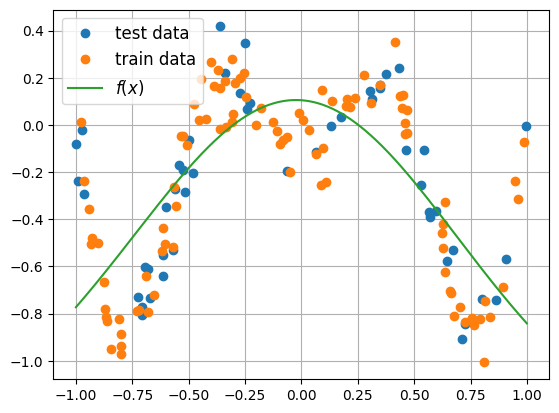

In [ ]:
test_features = []
test_targets = []
for data, target in test_loader:
    test_features.extend(data.numpy())
    test_targets.extend(target.numpy())

train_features = []
train_targets = []
for data, target in train_loader:
    train_features.extend(data.numpy())
    train_targets.extend(target.numpy())

plt.plot(test_features, test_targets, label=r'test data', marker="o",linestyle='None')
plt.plot(train_features, train_targets, label=r'train data', marker="o",linestyle='None')

p = np.arange(min_x, max_x, 0.001)
f_p = np.array([curr_model(torch.tensor ([p_i], dtype=torch.float32)).detach().numpy() for p_i in p]).flatten()

print(len(f_p))
plt.plot(p, f_p, label=r'$f(x)$')
plt.grid(True)
plt.legend (loc='best', fontsize=12)
# plt.ylim(-3, 3)
# plt.xlim(-3, 3)
plt.show()